> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

I chose to work on TMDb movie data set which contains metadata about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

My research questions are the following:

1. what is the most popular film, which films have the highest budget and the highest revenue, which movie is the longest
2. which film genre was produced the most in every 10 year gap
3. what are the top 10 films with the highest revenue
4. what are the top 10 films with the highest vote
5. what makes top 10 films with the highest vote so popular? What's their budget and revenue? Duration? Which actors appear in? What are key words describing the story?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data assessment & Data cleaning

We will load the data and assess its shape:

In [2]:
data = pd.read_csv("tmdb-movies.csv")
data.shape

(10866, 21)

It contains 21 columns and 10866 rows (the information about 10866 movies).

Let's have a look at the first five rows:

In [3]:
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


One column is missing in this output, so we will print out all column names:

In [4]:
data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

So this data set contains the following information about each movie:

- `id` and `imdb_id`
- `popularity` score, number of votes (`vote_count`) and average vote (`vote_average`);
- `budget` and `revenue` information (the last two columns - `budget_adj` and `revenue_adj` - show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time);
- `release_date`, `release_year`;
- `original_title`, `tagline`, `genres`, `keywords`, `overview`, `homepage`;
- `director`, `cast`, `production_companies`.

Already at this stage we can see that not every column is needed for our research questions:

- We don't need `id` and `imdb_id` columns. 
- `budget_adj` and `revenue_adj` are also irrelevant. 
- The information about release year is sufficient, we do not need more specific details given in `release_date`.
- `homepage` and `tagline` won't contribute to our analysis either. 

Let's drop non relevant columns!

In [5]:
data.drop(['id','imdb_id','homepage','tagline','release_date','budget_adj','revenue_adj'], axis=1, inplace=True)
data.shape

(10866, 14)

Let's check up missing values and data types:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   keywords              9373 non-null   object 
 7   overview              10862 non-null  object 
 8   runtime               10866 non-null  int64  
 9   genres                10843 non-null  object 
 10  production_companies  9836 non-null   object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 1.2+ MB


First, data types seem to be correct for every column (integers and floats for numerical values; strings for qualitative data). This is great news because we will not need to fix data types ! However, we will have to deal with missing values. 

Based on this output we learn the following information about our data set:

- some missing values (up to 100) in `cast`, `director`, `overview`, `genres` columns
- `keywords`, `production_companies` all have more than 100 missing values

Since we are dealing with qualitative data, it would be hard to restore missing values based on general distributions, so the rows with missing values will be simply dropped from our data frame:

In [7]:
data.dropna(inplace=True)
data.shape

(8667, 14)

Almost 2000 rows were dropped out. 

Lastly, let's check if there are any duplicated rows in our data:

In [8]:
sum(data.duplicated())

1

Thre are indeed duplicates, we will remove them:

In [9]:
data.drop_duplicates(inplace=True)
data.shape

(8666, 14)

Our data set is now ready to be checked up for general properties.

### General Properties

First, let's have another look at the first five rows of the remaining columns:

In [10]:
data.head()

,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


As expected, there are columns with multiple values separated by `|`: `cast`, `keywords`, `genres` and `productions_compagnies`. We'll have to deal with this percularity to answer to our reserch questions. We will use the following function for this purpose: 

In [11]:
def break_cells(data,column):
    """
    Input: data frame, its column with multiple values
    Output: data frame with column values separated into different rows
    """
    return data.set_index(data.columns.drop(column).to_list()).stack().str.split('|',
            expand=True).stack().unstack(-2).reset_index(-1, drop=True).reset_index()

We will proceed with quantitavive variables exploration (we use `.apply(lambda s: s.apply('{0:.5f}'.format))` to remove scientific notation, as suggested on [StackOverflow](https://stackoverflow.com/questions/40347689/dataframe-describe-suppress-scientific-notation))

In [12]:
data.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,8666.00000,8666.00000,8666.00000,8666.00000,8666.00000,8666.00000,8666.00000
mean,0.74194,17709374.60028,49248634.44842,103.81514,264.20482,6.00361,2000.12982
std,1.08766,33573621.88363,128952938.07639,26.20719,635.19581,0.89354,13.22128
min,0.00019,0.00000,0.00000,0.00000,10.00000,1.50000,1960.00000
25%,0.24999,0.00000,0.00000,91.00000,20.00000,5.50000,1993.00000
50%,0.44938,1500000.00000,179382.00000,100.00000,54.00000,6.10000,2004.00000
75%,0.84298,21000000.00000,38902688.75000,113.00000,200.00000,6.60000,2011.00000
max,32.98576,425000000.00000,2781505847.00000,705.00000,9767.00000,8.70000,2015.00000


A lot of columns in this data are skewed:

- This data set covers movies from 1960 to 2015, half of the movies was produced between 2004 and 2015;
- Popularity ranges from 0.00019 to 32.98576, however, at least 75% of movies have their popularity rate less than 1;
- Budget and revenue have 0 for at least 25% of data, however, overall revenues are higher than budgets;
- The average runtime is 1h 40, the longest movie lasts almost 12h!
- Votes range from 1.5 to 8.6 and in general movies have a good note (mean of vote averages is 6)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: what is the most popular film? Which films have the highest budget and the highest revenue ? Which movie is the longest?

Let's check up the most popular movie:

In [13]:
data.loc[data['popularity'] == data['popularity'].max()]

,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015


The most popular film (popularity rate 32.985763) is Jurasic World

Let's see which movie has the highest budget:

In [14]:
data.loc[data['budget'] == data['budget'].max()]

,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year
2244,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,assassin|small town|revenge|deception|super speed,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,74,6.4,2010


The film with the highest budget is The Warrior's Way (its budget is almost 40 times higher than its revenue). However, Wikipedia suggests that its budget is not 425M but 42M (the revenue of 11M seems to be correct). So there might be an extra 0 in budget column, or the Wiki is wrong. 

And what about the movie with the highest revenue?

In [15]:
data.loc[data['revenue'] == data['revenue'].max()]

,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,8458,7.1,2009


It's Avatar, its revenue is more than 10 times bigger than its budget. 

Lastly, which movie is the longest?

In [16]:
data.loc[data['runtime'] == data['runtime'].max()]

,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year
2722,0.537593,0,125000000,Band of Brothers,Damian Lewis|Ron Livingston|Frank John Hughes|...,Phil Alden Robinson|Richard Loncraine|Mikael S...,world war ii|us army|war|paratroops|combat,Drawn from interviews with survivors of Easy C...,705,Action|Drama|War,HBO,313,8.0,2001


12h that we got earlier make sense now since Band of Brothers, according to Google, is not a movie but a war drama miniseries with 10 episodes..

### Research Question 2: which film genre was produced the most in every 10 years gap

First, we need to introduce a specific column with categorical characteristics of the 10-years gap:

In [17]:
bin_edges = [1960,1970,1980,1990,2000,2010,2015]
bin_names = ["60-70","70-80","80-90","90-00","00-10","10-15"]

data['year'] = pd.cut(data['release_year'], bin_edges, labels=bin_names)
data.head()

,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,10-15
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,10-15
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,10-15
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,10-15
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,10-15


Next, since cells in genres collumns contain multiple genres for each film, we will break them down with `break_cells` function, introduced earlier:

In [18]:
genres = break_cells(data,"genres")
genres.head()

,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,production_companies,vote_count,vote_average,release_year,year,genres
0,0.000188,0,0,The Hospital,George C. Scott|Diana Rigg|Richard Dysart|Barn...,Arthur Hiller,hospital|malpratice,Black comedy in which a suicidal doctor strugg...,103,Simcha Productions,10,6.4,1971,70-80,Mystery
1,0.000188,0,0,The Hospital,George C. Scott|Diana Rigg|Richard Dysart|Barn...,Arthur Hiller,hospital|malpratice,Black comedy in which a suicidal doctor strugg...,103,Simcha Productions,10,6.4,1971,70-80,Comedy
2,0.000188,0,0,The Hospital,George C. Scott|Diana Rigg|Richard Dysart|Barn...,Arthur Hiller,hospital|malpratice,Black comedy in which a suicidal doctor strugg...,103,Simcha Productions,10,6.4,1971,70-80,Drama
3,0.000620,0,0,G.B.F.,Michael J. Willett|Paul Iacono|Sasha Pieterse|...,Darren Stein,gay|gay kiss|coming out|high school|friends,The bitter fight for supremacy between the thr...,92,School Pictures|Parting Shots Media|Logolite E...,82,6.1,2013,10-15,Comedy
4,0.001115,0,0,Khosla Ka Ghosla!,Anupam Kher|Boman Irani|Parvin Dabas|Tara Shar...,Dibakar Banerjee,bollywood,"Upon retirement, cranky control freak Kamal Ki...",135,UTV Motion Pictures,10,6.8,2006,00-10,Comedy


Finally, we will group data by 10-year periode and genres and find the most numerous genre for each period. The following plot summarizes our findings:

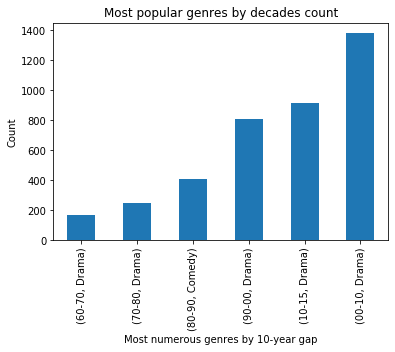

In [19]:
popoular_genres = genres.groupby(["year","genres"]).size().sort_values().groupby(level=0).tail(1)
popoular_genres.plot(kind="bar")
plt.xlabel("Most numerous genres by 10-year gap")
plt.ylabel("Count")
plt.title("Most popular genres by decades count");

Dramas were the most produced movie genres all the time (except for 80s - where there were more comedies than anything else). Overall, the number of dramas turned in every decade seems to be higher and higher.

### Research Question 3: what are the top 20 films with the highest revenue

We already know that Avatar is the movie with the highest revenue, but what is the top 20 of such movies?

In [20]:
high_revenue = data.sort_values(by=['revenue'],ascending=False)[:20]
high_revenue

,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,year
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,8458,7.1,2009,00-10
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,10-15
5231,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,shipwreck|iceberg|ship|panic|titanic,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,4654,7.3,1997,90-00
4361,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,new york|shield|marvel comic|comic|superhero,When an unexpected enemy emerges and threatens...,143,Science Fiction|Action|Adventure,Marvel Studios,8903,7.3,2012,10-15
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,10-15
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,10-15
14,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,marvel comic|comic|sequel|superhero|vision,When Tony Stark tries to jumpstart a dormant p...,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4304,7.4,2015,10-15
3374,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,self sacrifice|magic|frog|sorcerer|school,"Harry, Ron and Hermione continue their quest t...",130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,3750,7.7,2011,10-15
5422,6.112766,150000000,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,queen|musical|princess|betrayal|snowman,Young princess Anna of Arendelle dreams about ...,102,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3369,7.5,2013,10-15
5425,4.946136,200000000,1215439994,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,Shane Black,terrorist|war on terror|tennessee|malibu|marve...,When Tony Stark's world is torn apart by a for...,130,Action|Adventure|Science Fiction,Marvel Studios,6882,6.9,2013,10-15


To plot the results we will use `plt.ticklabel_format(style='plain', axis='x')` to avoid scientific notation (cf. [StackOverflow](https://stackoverflow.com/questions/36780948/seaborn-matplotlib-how-to-repress-scientific-notation-in-factorplot-y-axis))

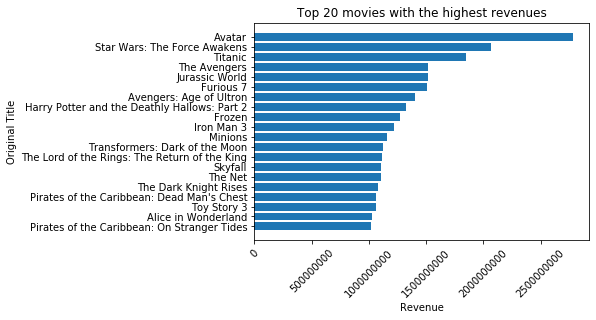

In [21]:
plt.barh(high_revenue["original_title"][:20],high_revenue['revenue'][:20])
plt.gca().invert_yaxis() #descending revenue
plt.xticks(rotation=45) #for x-labels not to overlap
plt.xlabel("Revenue")
plt.ylabel("Original Title")
plt.ticklabel_format(style='plain', axis='x')
plt.title("Top 20 movies with the highest revenues");

### Research Question 4: what are top 20 films carecteristics with the highest revenue? Director, cast, genre, keywords, production compagny?

Let's assess the budget of these movies and compare it to their revenue:

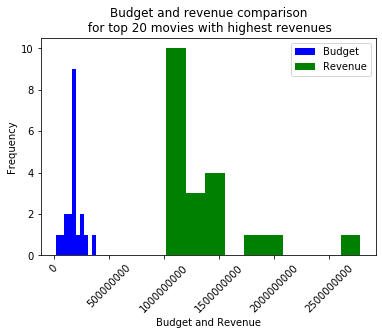

In [24]:
plt.hist(high_revenue["budget"],color="b",label="Budget")
plt.hist(high_revenue["revenue"],color="g",label="Revenue")
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)
plt.xlabel("Budget and Revenue")
plt.ylabel("Frequency")
plt.legend()
plt.title("Budget and revenue comparison\n for top 20 movies with highest revenues");

Budget and revenue do not overlap, moreover, there is a big gap between the two: budget for these movies is way low compared to their revenue.

What can we say about their runtime and avarage vote?

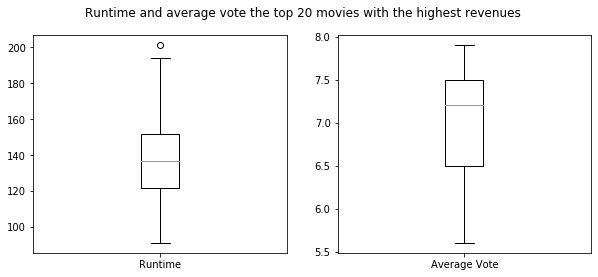

In [26]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.boxplot(high_revenue["runtime"])
plt.xticks([1],["Runtime"])

plt.subplot(1,2,2)
plt.boxplot(high_revenue["vote_average"])
plt.xticks([1],["Average Vote"])

plt.suptitle("Runtime and average vote the top 20 movies with the highest revenues");

In general, these movies last a bit more than two hours and they are well notated, in average more than 7. 

Which are the keywords that describe these movies?

In [27]:
keywords = break_cells(high_revenue,"keywords")
keywords.groupby(["keywords"]).size().sort_values(ascending=False)

keywords
marvel comic        3
monster             2
superhero           2
based on novel      2
comic               2
                   ..
fantastic           1
fall from height    1
exotic island       1
evil mastermind     1
witch               1
Length: 92, dtype: int64

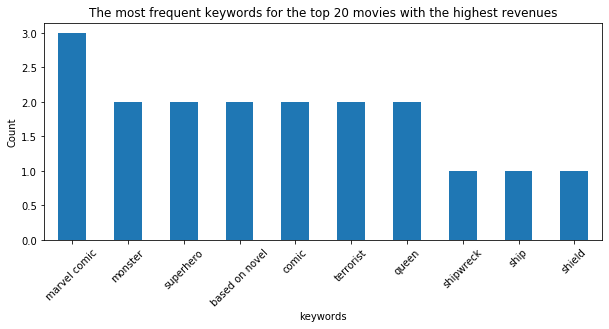

In [33]:
plt.figure(figsize=(10,4))
keywords.groupby(["keywords"]).size().sort_values(ascending=False)[:10].plot(kind="bar")
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title("The most frequent keywords for the top 20 movies with the highest revenues");

"Marvel comic" is associated with 3 movies, so not surprisingly, we find such terms as "monster", "superhero", "comic", "terrorist" twice in these movies description. Other words that appear twice are "monster" and "queen".

Are there actors who play more than once in these movies?

In [30]:
cast = break_cells(high_revenue,"cast")
cast.groupby(["cast"]).size().sort_values(ascending=False)

cast
Johnny Depp             3
Robert Downey Jr.       3
Orlando Bloom           2
Mark Ruffalo            2
Anne Hathaway           2
                       ..
Helena Bonham Carter    1
Harrison Ford           1
Gwyneth Paltrow         1
Guy Pearce              1
Zoe Saldana             1
Length: 87, dtype: int64

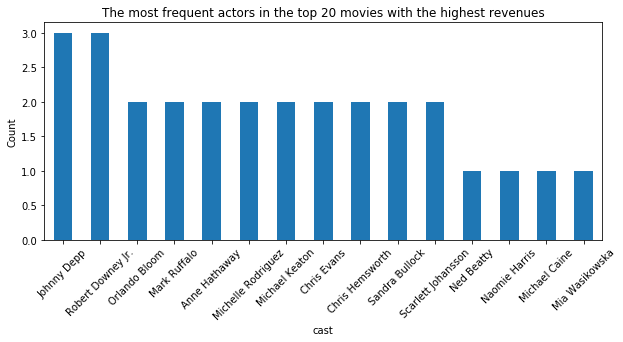

In [32]:
plt.figure(figsize=(10,4))
cast.groupby(["cast"]).size().sort_values(ascending=False)[:15].plot(kind="bar")
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title("The most frequent actors in the top 20 movies with the highest revenues");

And the answer is yes! Johnny Depp and Robert Downey Jr appear 3 times in these movies! 

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

1. During this analysis we have found several "the most ... movie"! The most popular film is Jurasic World. The longest film is Band of Brothers (12h which makes sense since it's mini series). The highest budget seems to have been allocated to The Warrior's Way and the film with the highest revenue is Avatar.
2. The most produced movie genre of all the time is drama, except for 80s where there were more comedies than any other type of movie.
3. The top 5 movies with the highest revenue, after Avatar, are Star Wars: The Force Awakens, Titanic, The Avengers and Jurasic World (the latter is also the most popular movie)
4. We also found some patterns about top 20 movies with the highest revenue:
    - their revenue is way higher than their budget;
    - they have a good rating (more than 7) and on average they last more than 2 hours;
    - most of the keywords are associated with Marvel comics universe
    - Robert Downey Jr. and Johnny Depp appear 3 times in these 20 films! Robert Downey Jr. plays in movies based on Marvel comics; Johnny Depp - twice in Pirates of the Caribbean and once in Alice in Wonderland.

<a id='limitations'></a>
## Limitations

1. It would be nice to have more information about the data set composition: 
    - for instance, what exactly is the popularity? We found out that the most "popular" film is Jurasic Park but we do not know what exactly it means, since there is a different column for ratings;
    - what types of movies are included into this data set? Based on our findings we can conclude that not only films but also TV-series are included. It would be nice to have a psecific column for this purpose, so we can find easily the longest movie and the longest TV-series.
2. Some results may be not relevant, since the data may contain misleading information (double-checked in Google and/or Wikipedia): for instance, the longest film (Band of Brothers) is not a film but a mini series; the film with the highest budget (The Warrior's Way) might have a real budget which is 10 times lower. 